# Handwritten digits classification using neural network

In [26]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [27]:
(X_train, y_train), (X_test,y_test)= keras.datasets.mnist.load_data()

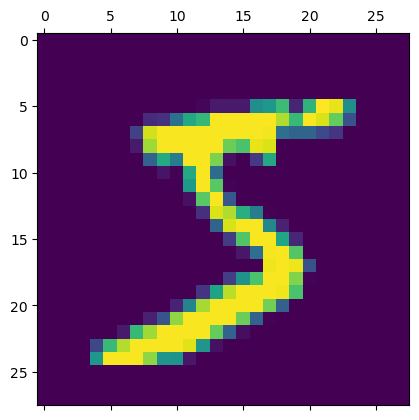

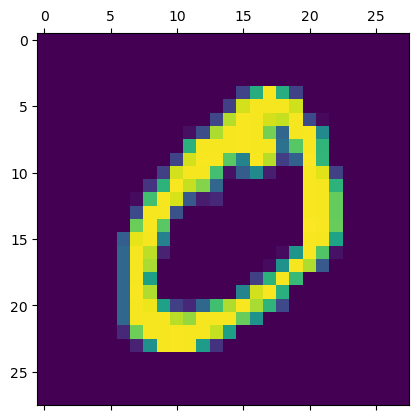

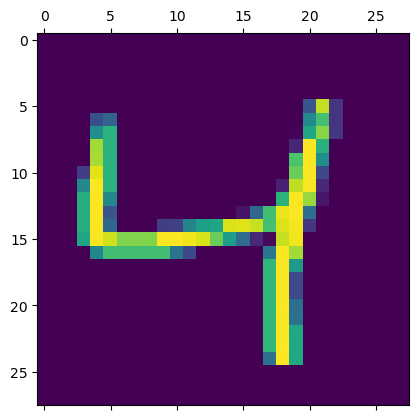

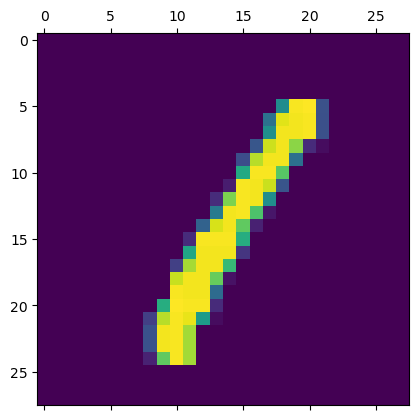

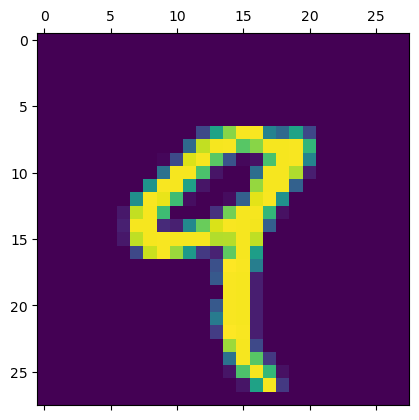

In [32]:
#plotting mnist data
for i in range(0,5):
    plt.matshow(X_train[i])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
#scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [29]:
#reshapping arrays
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [12]:

model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4741 - accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9277
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2533 - accuracy: 0.9293
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.251

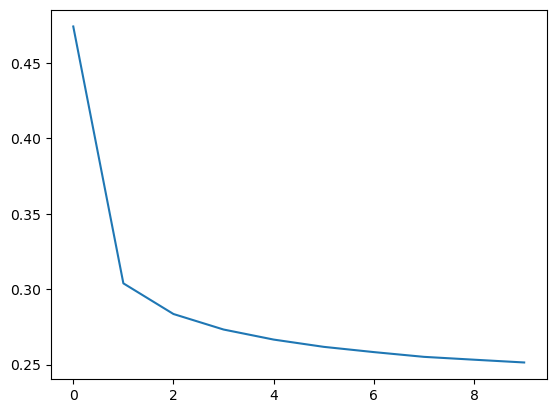

In [13]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [14]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2628 - accuracy: 0.9271


[0.26275184750556946, 0.9271000027656555]

In [15]:
#Predicitng on train and test data
train_predict = model.predict(X_train_flattened)
test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_predicted_labels = [np.argmax(i) for i in test_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [17]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    8,  927,   13,    9,    4,   14,   12,   34,    5],
       [   4,    0,   20,  916,    0,   24,    3,   12,   20,   11],
       [   1,    1,    2,    2,  914,    0,   12,    5,    5,   40],
       [  10,    3,    3,   30,   11,  773,   16,    9,   29,    8],
       [  12,    3,    9,    1,    7,   10,  913,    1,    2,    0],
       [   2,    6,   19,    5,    6,    1,    0,  954,    1,   34],
       [   7,   12,    6,   23,    9,   20,   10,   10,  863,   14],
       [  11,    7,    1,    8,   21,    5,    0,   17,    6,  933]])>

Text(95.72222222222221, 0.5, 'Truth')

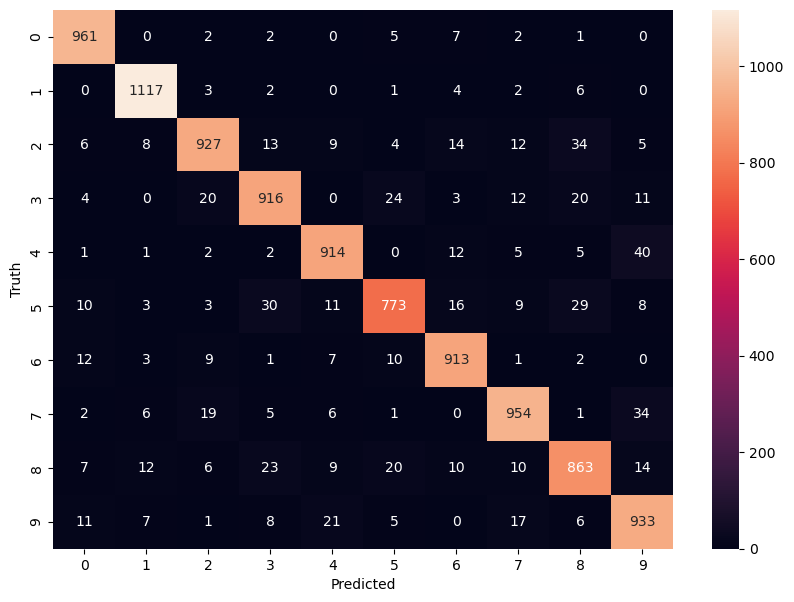

In [18]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden layer to improve model performance


In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2698 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1226 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018

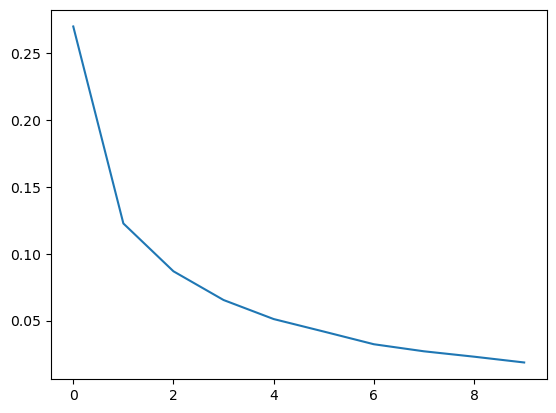

In [20]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [21]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.9750


[0.0875372663140297, 0.9750000238418579]

In [22]:
#Predicitng on train and test data
train_predict = model.predict(X_train_flattened)
test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [23]:
y_predicted_labels = [np.argmax(i) for i in test_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [24]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    3,    1,    0,    1,    4,    1,    2,    0],
       [   0, 1120,    3,    1,    0,    0,    3,    0,    8,    0],
       [   2,    0,  997,   10,    1,    1,    3,    3,   14,    1],
       [   0,    0,    0,  995,    0,    7,    0,    4,    3,    1],
       [   0,    0,    3,    0,  959,    0,    6,    2,    2,   10],
       [   2,    1,    0,   17,    1,  860,    5,    1,    4,    1],
       [   4,    3,    2,    1,    1,    5,  937,    0,    5,    0],
       [   1,    1,    8,    3,    1,    0,    0, 1001,    7,    6],
       [   3,    0,    3,   10,    2,    5,    2,    3,  942,    4],
       [   1,    2,    1,    9,    8,    3,    0,    5,    9,  971]])>

Text(95.72222222222221, 0.5, 'Truth')

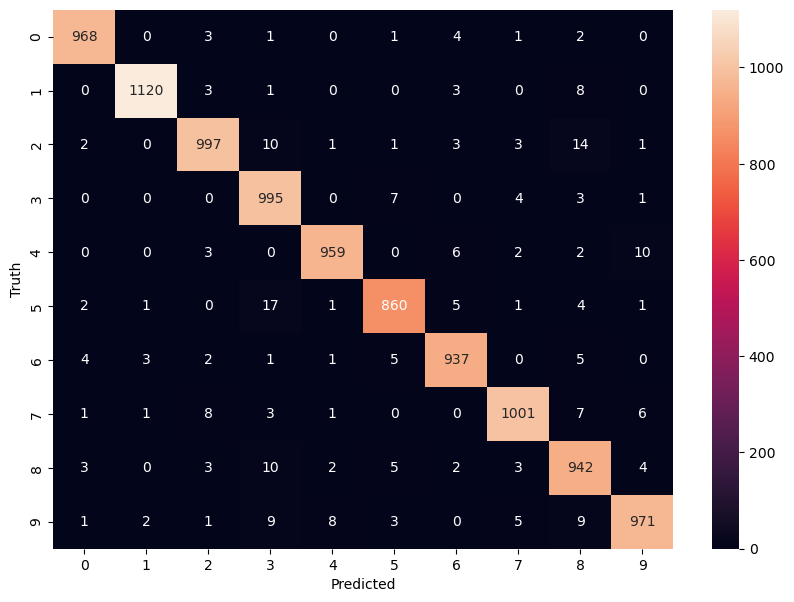

In [25]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')